In [1]:
# import libraries
from dataclasses import dataclass, field
import numpy as np
import random 
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px

In [2]:
@dataclass
class Firm:

    fid: int
    productivity: float
    dcost: float
    exporting: bool = False
    profit: float = 0.0
    status: str = 'stay'


    def calculate_profit(self, market_price: float):
        revenue = np.dot(self.productivity, market_price)    
        self.profit = revenue - self.dcost
    
    def decide_export(self, market_price: float, trade_cost: float):
        # Calculate the firm's profit based on the current market price
        self.calculate_profit(market_price)
    
        # Endogenously determine trade cost based on the firm's productivity
        # trade_cost = 10 / (self.productivity + 1)  # Example: higher productivity leads to lower trade cost
    
        # Firm exports only if the profit is greater than the trade cost
        if not self.exporting and self.productivity > trade_cost:
            self.exporting = True  # Start exporting
            self.status = 'exporting'

        
    def reset_firm(self):
        self.productivity = 0
        self.dcost = 0
        self.exporting = False
        self.profit = 0.0


In [3]:
# Create a list of firms
def create_firms(shape: float, num_firms: int, market_price: float):
    firms = []
    productivities = np.random.zipf(shape, num_firms)
    sorted_productivities = sorted(productivities)
    for id, productivity in enumerate(sorted_productivities):
        cost = random.uniform(1, 5)  # Random cost between 1 and 5
        firm = Firm(fid=id, productivity=productivity, dcost=cost)
        firm.calculate_profit(market_price=market_price)
        firms.append(firm)
    return firms

In [4]:
def tfirms_zipft_dist(num_firms, shape):
    tfirms = np.random.zipf(shape, num_firms)
    return tfirms

In [5]:
# Example usage
num_firms: int = 200000
shape: int = 4.0
market_price = 10.0
trade_cost = 2.0
num_rounds = 10

firms = create_firms(shape=shape, num_firms=num_firms, market_price=market_price)

# Number of simulation rounds
num_rounds = 50

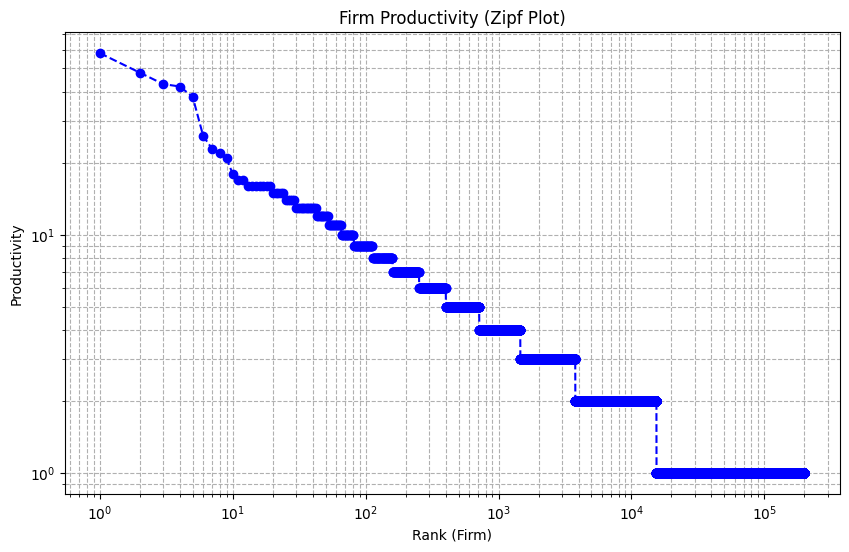

In [29]:
def plot_productivity_zipf(firms: list):
    # Extract and sort productivity values in descending order
    productivities = sorted([firm.productivity for firm in firms], reverse=True)
    
    # Create the rank (position) of each firm
    ranks = np.arange(1, len(productivities) + 1)
    
    # Plot productivity vs. rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, productivities, marker='o', linestyle='--', color='b')
    plt.title('Firm Productivity (Zipf Plot)')
    plt.xlabel('Rank (Firm)')
    plt.ylabel('Productivity')
    plt.grid(True, which="both", ls="--")
    plt.show()

plot_productivity_zipf(firms)

In [7]:

def firm_dataframe(firms: list):
    '''
    Structure the firms list from object to dataframe.
    
    Parameters:
    firms (list): A list of firm objects, each with attributes such as
                  fid, productivity, dcost, exporting, profit, and status.
    
    Returns:
    pd.DataFrame: A pandas DataFrame containing the structured data from the firms list.
    '''
    
    data = {
        'fid': [firm.fid for firm in firms],
        'productivity': [firm.productivity for firm in firms],
        'dcost': [firm.dcost for firm in firms],
        'exporting': [firm.exporting for firm in firms],
        'profit': [firm.profit for firm in firms],
        'status': [firm.status for firm in firms]
    }
    
    return pd.DataFrame(data)

# apply the function:
df = firm_dataframe(firms)
print(df)

           fid  productivity     dcost  exporting      profit status
0            0             1  4.404489      False    5.595511   stay
1            1             1  1.001230      False    8.998770   stay
2            2             1  1.860227      False    8.139773   stay
3            3             1  3.618272      False    6.381728   stay
4            4             1  1.658156      False    8.341844   stay
...        ...           ...       ...        ...         ...    ...
199995  199995            38  3.545670      False  376.454330   stay
199996  199996            42  1.881839      False  418.118161   stay
199997  199997            43  4.924357      False  425.075643   stay
199998  199998            48  2.664805      False  477.335195   stay
199999  199999            58  3.554149      False  576.445851   stay

[200000 rows x 6 columns]


In [25]:
def plot_firm_profit(firms: list):
    # Extract and sort productivity values in descending order
    profits = sorted([firm.profit for firm in firms], reverse=True)
    
    # Create the rank (position) of each firm
    ranks = np.arange(1, len(profits) + 1)
    
    # Plot productivity vs. rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, profits, marker='o', linestyle='-', color='b')
    plt.title('Firm Profits (Zipf Plot)')
    plt.xlabel('Rank (Firm)')
    plt.ylabel('Profits')
    plt.grid(True, which="both", ls="--")
    plt.show()

# uncomment if necessary
# plot_firm_profit(firms)

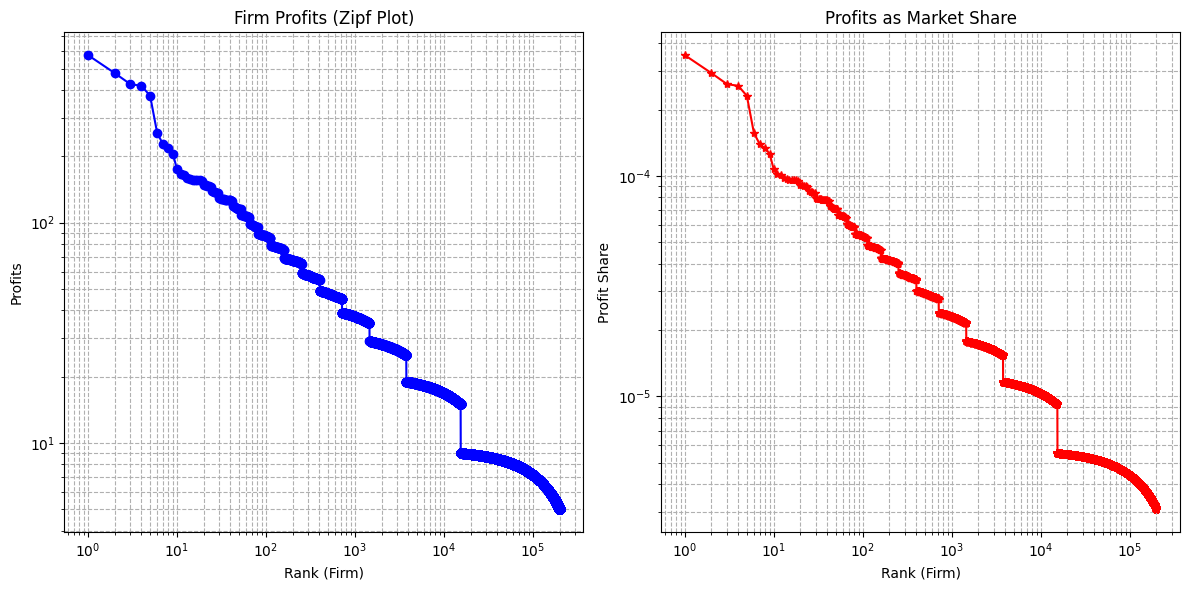

In [11]:

def plot_profit_marketshare_compared_side_byside(firms: list):
    # extract and sort profit values, descending order
    profits = sorted([firm.profit for firm in firms], reverse=True)
    
    # calculate profits as a share of total profits
    total_profits = sum(profits)
    profits_by_share = [profit / total_profits for profit in profits]

    # create the ranking of each firm
    ranks = np.arange(1, len(profits) + 1)

    # figure with two subplots, side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # first plot: Firm Profits (Zipf Plot)
    axes[0].loglog(ranks, profits, marker='o', linestyle='-', color='b')
    axes[0].set_title('Firm Profits (Zipf Plot)')
    axes[0].set_xlabel('Rank (Firm)')
    axes[0].set_ylabel('Profits')
    axes[0].grid(True, which="both", ls="--")

    # second plot: Profits as Market Share
    axes[1].loglog(ranks, profits_by_share, marker='*', linestyle='-', color='r')
    axes[1].set_title('Profits as Market Share')
    axes[1].set_xlabel('Rank (Firm)')
    axes[1].set_ylabel('Profit Share')
    axes[1].grid(True, which="both", ls="--")

    # Display the plots
    plt.tight_layout()
    plt.show()

# Example usage:
plot_profit_marketshare_compared_side_byside(firms)


In [12]:
def simulate_firms(firms, market_price, num_rounds, trade_cost):
    for _ in range(num_rounds):
        for firm in firms:
            if firm.status != "exit": 
                # Firms decide whether to export or stay local
                firm.decide_export(market_price, trade_cost)
        # Optionally print firm statuses for each round
    return firms

simulate_firms(firms, market_price, num_rounds, trade_cost)

[Firm(fid=0, productivity=np.int64(1), dcost=4.404488541425806, exporting=False, profit=np.float64(5.595511458574194), status='stay'),
 Firm(fid=1, productivity=np.int64(1), dcost=1.0012301914696504, exporting=False, profit=np.float64(8.99876980853035), status='stay'),
 Firm(fid=2, productivity=np.int64(1), dcost=1.8602271140308018, exporting=False, profit=np.float64(8.139772885969197), status='stay'),
 Firm(fid=3, productivity=np.int64(1), dcost=3.6182715247753228, exporting=False, profit=np.float64(6.381728475224677), status='stay'),
 Firm(fid=4, productivity=np.int64(1), dcost=1.6581556341561487, exporting=False, profit=np.float64(8.341844365843851), status='stay'),
 Firm(fid=5, productivity=np.int64(1), dcost=2.230253603383909, exporting=False, profit=np.float64(7.769746396616091), status='stay'),
 Firm(fid=6, productivity=np.int64(1), dcost=3.1825328227777896, exporting=False, profit=np.float64(6.817467177222211), status='stay'),
 Firm(fid=7, productivity=np.int64(1), dcost=3.3767

In [26]:
def plot_exporting(firms: list):
    # Extract and sort productivity values in descending order
    new_productivity = sorted([firm.productivity for firm in firms if firm.status != 'stay'], reverse=True)
    #return new_productivity
    # Create the rank (position) of each firm
    ranks = np.arange(1, len(new_productivity) + 1)
    
    # Plot productivity vs. rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, new_productivity, marker='o', linestyle='-', color='b')
    plt.title('Firm Exporting')
    plt.xlabel('Rank (Firm)')
    plt.ylabel('Exporting')
    plt.grid(True, which="both", ls="--")
    plt.show()

# uncomment if necessary
# plot_exporting(firms)

In [27]:
def plot_exporting_market_share(firms: list):
    # extract and sort productivity. eescending order
    exporting_market_share = sorted([firm.profit for firm in firms if firm.status != 'stay'], reverse=True)

    # create ranking of each firm
    ranks = np.arange(1, len(exporting_market_share) + 1)
    
    # calculate the market share for each firm
    new_market_share = exporting_market_share/sum(exporting_market_share)

    # plot productivity vs. rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, new_market_share, marker='*', linestyle='-', color='b')
    plt.title('Firm New Market Share After Exporting')
    plt.xlabel('Rank (Firm)')
    plt.ylabel('Exporting (%)')
    plt.grid(True, which="both", ls="--")
    plt.show()

# uncomment if necessary
# plot_exporting_market_share(firms)

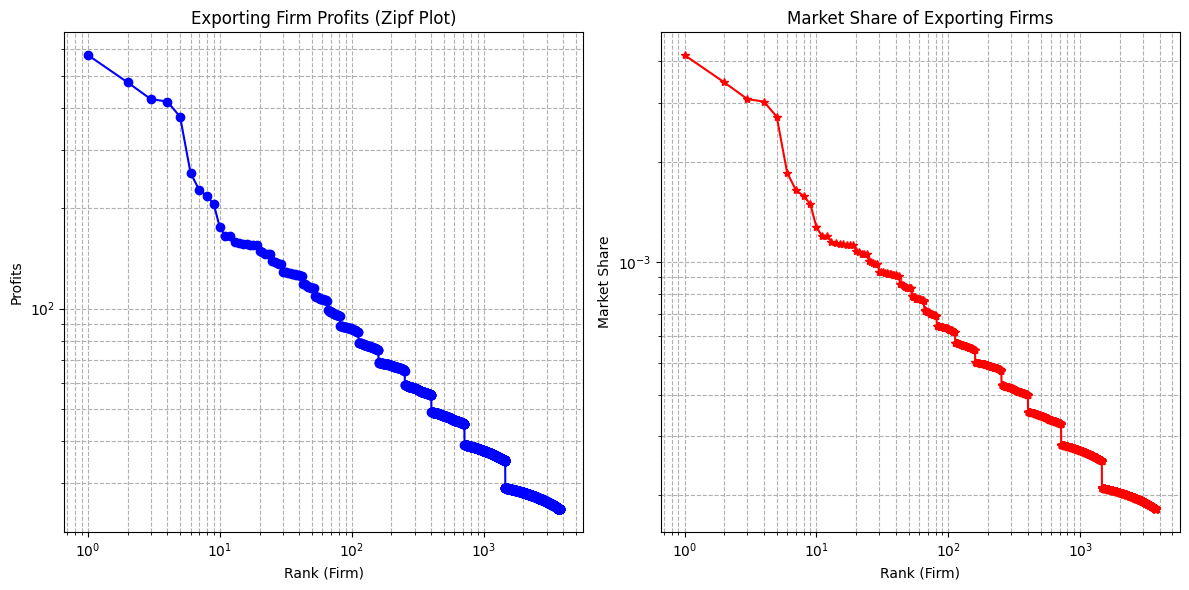

In [14]:

def plot_exporting_market_share_side_byside(firms: list):
    # filter firms exporting (status != 'stay') and extract profits
    exporting_firms = [firm for firm in firms if firm.status != 'stay']
    
    # extract and sort profit values for exporting firms
    exporting_market_share = sorted([firm.profit for firm in exporting_firms], reverse=True)

    # Create ranks based on the number of exporting firms
    ranks = np.arange(1, len(exporting_market_share) + 1)

    # Calculate the market share (profit as percentage of total profits of exporting firms)
    new_market_share = exporting_market_share / sum(exporting_market_share)

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # First plot: Exporting Firm Profits
    axes[0].loglog(ranks, exporting_market_share, marker='o', linestyle='-', color='b')
    axes[0].set_title('Exporting Firm Profits (Zipf Plot)')
    axes[0].set_xlabel('Rank (Firm)')
    axes[0].set_ylabel('Profits')
    axes[0].grid(True, which="both", ls="--")

    # Second plot: Market Share of Exporting Firms
    axes[1].loglog(ranks, new_market_share, marker='*', linestyle='-', color='r')
    axes[1].set_title('Market Share of Exporting Firms')
    axes[1].set_xlabel('Rank (Firm)')
    axes[1].set_ylabel('Market Share')
    axes[1].grid(True, which="both", ls="--")

    # Display the plots
    plt.tight_layout()
    plt.show()

# plot exporting and it share compared side by side
plot_exporting_market_share_side_byside(firms)
